<a href="https://colab.research.google.com/github/devdesai25/ml-practice/blob/main/ml_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
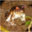

In [5]:
x_train[0]

In [6]:
y_train[0]

array([6], dtype=uint8)

In [7]:
print(f"x_train : {x_train.shape}")
print(f"y_train :{y_train.shape}")
print(f"x_test :{x_test.shape}")
print(f"y_test :{y_test.shape}")

x_train : (50000, 32, 32, 3)
y_train :(50000, 1)
x_test :(10000, 32, 32, 3)
y_test :(10000, 1)


In [8]:
print(x_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

[Description](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data#the_classes_are)
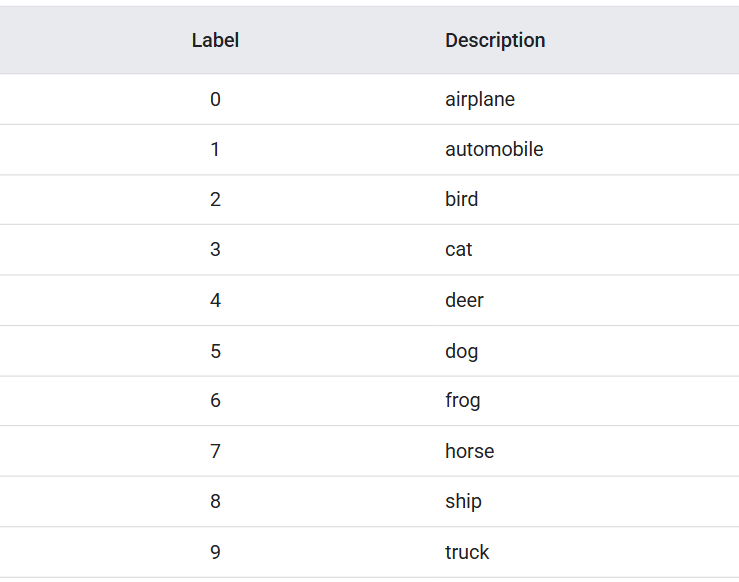

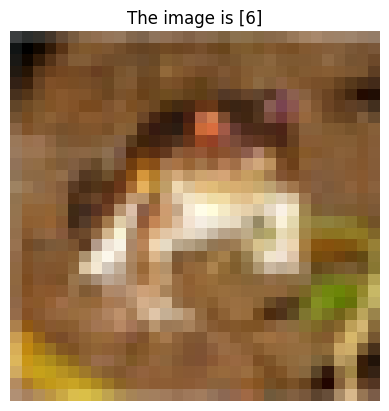

In [9]:
plt.imshow(x_train[0])
plt.title(f"The image is {y_train[0]}")
plt.axis('off')
plt.show()

In [10]:
x_train_copy = x_train/255.0
x_test_copy = x_test/255.0

In [11]:
def reset_env(seed=42):
  tf.keras.backend.clear_session()
  tf.keras.utils.set_random_seed(seed)

In [64]:
def build_model():

  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(32,32,3)),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Dropout(0.25),

      tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Dropout(0.25),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(10,activation="softmax")
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

  return model

In [69]:
def run_experiment():

  reset_env()

  model = build_model()

  early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

  history = model.fit(
      x_train_copy,y_train,
      validation_data=(x_test_copy,y_test),
      validation_split=0.2,
      epochs=50,
      callbacks=[early_stop],
      batch_size=32,
      verbose=1
  )

  test_loss, test_accuracy = model.evaluate(x_test_copy, y_test)
  print(f"Test Loss: {test_loss}")
  print(f"Test Accuracy: {test_accuracy}")

  return history,test_loss, test_accuracy

In [70]:
history, test_loss, test_acc = run_experiment()


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3823 - loss: 1.7051 - val_accuracy: 0.5959 - val_loss: 1.1141
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5916 - loss: 1.1620 - val_accuracy: 0.6161 - val_loss: 1.1002
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6530 - loss: 0.9978 - val_accuracy: 0.7024 - val_loss: 0.8480
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6825 - loss: 0.9200 - val_accuracy: 0.6797 - val_loss: 0.9172
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7058 - loss: 0.8617 - val_accuracy: 0.7251 - val_loss: 0.8113
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7219 - loss: 0.8109 - val_accuracy: 0.7496 - val_loss: 0.7328
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7370 - loss: 0.7700 - val_accuracy: 0.7378 - val_loss: 0.7892
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7465 - loss: 0.7369 -

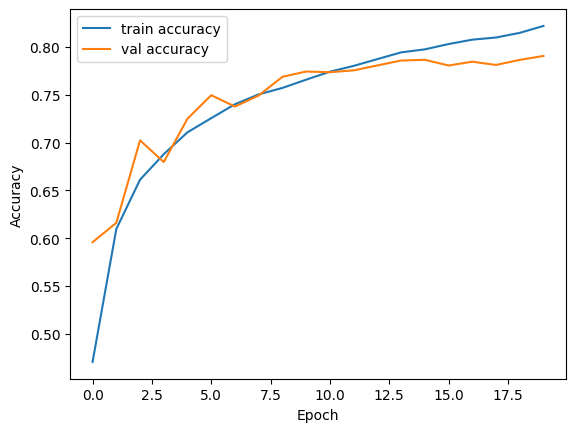

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


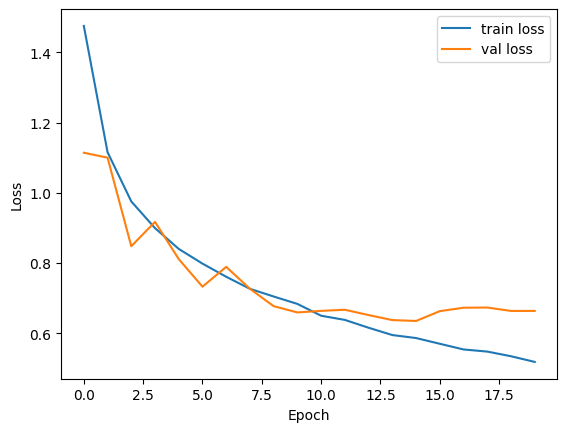

In [72]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

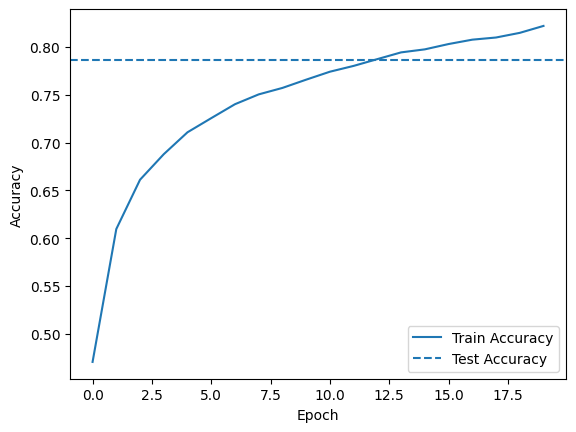

In [73]:
# plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.axhline(y=test_acc, linestyle='--', label='Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
